## I. 개요
- 결정트리모형의 기본적인 개념을 이해한다. 
- 결정트리모형을 활용한 회귀모형 문제는 어떻게 활용하는지 알아본다. 

## II. 결정 트리 모형
- 결정 트리는 분류, 회귀, 다중출력 작업도 가능한 활용범위가 많은 머신러닝 알고리즘이다. 
- 결정 트리는 최근에 사용하는 `랜덤포레스트`, `XGboost`, `LightGBM`과 같은 모형의 기본 구성 요소이다.



### (1) 의사결정 나무 예제
- 의사 결정 나무에서 자주 사용되는 예제를 우선 확인해보자. 
- 먼저, 데이터셋을 기준으로 `IRIS` 붓꽃의 종류는 아래와 같이 3가지로 구성되어 있다. 
  + `Versicolor`, `Setosa`, `Virginica`
![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

- 위 이미지에서 보는 것처럼, 종에 따라 잎의 크기가 다른 것을 확인할 수 있다. 이제 예제 데이터를 불러오는 것부터 시작해보자. 

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, max_depth = 2)


# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

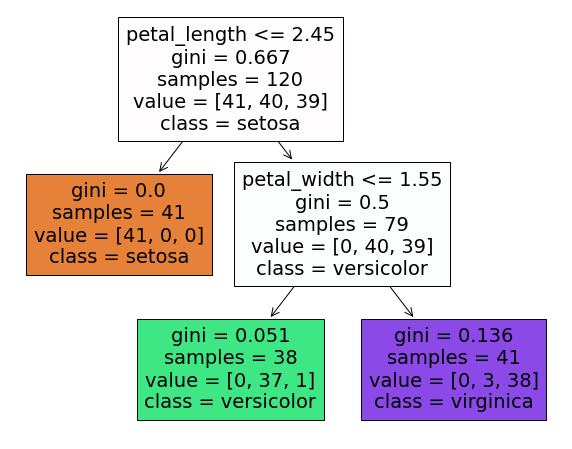

In [14]:
import matplotlib.pyplot as plt

explt_vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
fct_val = {0: 'setosa', 1: 'versicolor', 2: "virginica"}

plt.figure(figsize = (10,8))
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True);

- 우선 의사결정 나무의 큰 특징은 매우 직관적이다. 먼저 뿌리노드 (깊이가 0인 맨 꼭대기의 노드)에서 시작한다. 
  + `petal_length`의 `2.45cm` 보다 짧은지 검사하여 True인 경우는 왼쪽으로 `False`인 경우는 오른쪽으로 1차적으로 분류한다. 
  + 이 때, `리프 노드`는 분류의 마지막 지점이기 때문에 더 이상 추가적인 검사를 하지 않는다. 
- 결정트리의 결과값 해석은 이게 끝이다. 
- 또 하나의 특징은, 일반적인 선형회귀와 다르게 데이터 전처리가 거의 필요하지 않다. 


### (2) 불순도
- 지니 불순도의 개념
  + 한 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드를 순수(gini=0)이라고 함
$$G_{i} = 1 - \sum_{k=1}^{n}\left ( P_{i,k} \right )^{2}$$

- 위 `gini=0.136` 나온 것을 확인하면 다음과 같다. 



In [16]:
gini = 1 - (0/41)**2 - (3/41)**2 - (38/41)**2
print('The value of Gini is: {:.3f}'.format(gini))

The value of Gini is: 0.136


### (3) 결정 트리의 경계
- 결정 트리의 결정 경계를 보여주는 시각화를 작성한다. 
- 소스코드 출처(핸즈온 머신러닝 2)

![](https://learning.oreilly.com/library/cover/9781492032632/250w/#center)

Text(4.05, 0.5, '(Depth=2)')

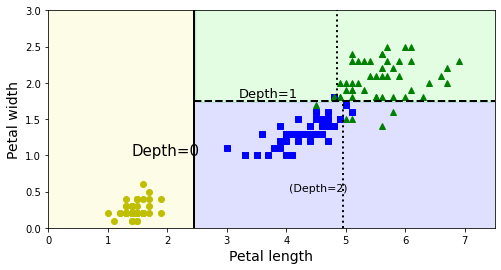

In [20]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

- Depth = 0: Petal_Length의 길이를 `2.45cm`를 의미한다. 


### (4) 규제 매개변수
- 기본 개념: 훈련 데이터에 대한 과대적합을 피하기 위해 학습할 때, 결정 트리의 자유도를 제한한다. 
- 기본값에서 `None`의 의미는 제한이 없음을 의미한다. 
  + 즉, 과적합이 되기 싶다는 뜻이다. 
- 규제 매개변수에 관한 대략적인 설명은 다음과 같다. 
  + `min_samples_split`: 분할되기 위해 노드가 가져야 최소 샘플 수
  + `min_samples_leaf`: 리프 노드가 가지고 있어야 할 최소 샘플 수 
  + `min_weight_fraction_leaf`: 가중치가 부여된 전체 샘플 수에서의 비율
  + `max_leaf_nodes`: 리프 노드의 최대 수
  + `max_features`: 각 노드에서 분할에 사용할 특성의 최대 수
- `min_`으로 시작하는 것을 증가시키거나, 도는 `max_`으로 시작하는 것을 감소시키면 모델에 규제가 커짐. 
  + `pruning`: 가지치기의 일종으로 순도를 높이는 것이 통계적으로 효과가 없다면 `리프 노드` 바로 위의 노드는 불필요하다. (이 때, 카이제곱 검정을 사용함). 
  

### III. 결정 트리 회귀 모형 예제
- 이러한 사전 지식을 배경으로 회귀 모형을 만듭니다. 


### (1) 데이터셋 만들기
- 지난 선형회귀 때와 동일한 데이터를 학습합니다. 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.datasets import load_boston

boston_raw = load_boston()
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_boston = sklearn_to_df(boston_raw)
df_boston = df_boston.rename({"target": "MEDV"}, axis='columns')

# 종속변수 및 독립변수 데이터 셋으로 분리
y_target = df_boston['MEDV']
X_data = df_boston.drop(['MEDV'], axis = 1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

### (2) 결정 트리 모형 만들기
- 간단하게 코드를 구현해보자. 

In [41]:
my_1st_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
my_1st_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

### (3) 모형 예측 및 평가 
- 적합된 모형을 예측하고 평가하도록 한다. 

In [42]:
y_preds = my_1st_tree.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2_points = r2_score(y_test, y_preds)
print("RMSE:", rmse)
print("R^2:", r2_points)

RMSE: 3.738238738077283
R^2: 0.8475314269410481


- 지난 선형 회귀 때와 비교하면 다음과 같이 정리할 수 있다. 

| 모델 | RMSE  | R2score  |
|---|---|---|
| 선형회귀  | 4.45  | 0.78  |
| 결정트리회귀(max_depth=2)  |  5.06 | 0.72 |
| 결정트리회귀(max_depth=3)  |  4.21 | 0.80 |
| 결정트리회귀(max_depth=4)  |  3.52 | 0.86 |
| 결정트리회귀(max_depth=5)  |  3.73 | 0.84 |

- max_depth의 옵션을 변동하면, `RMSE`와 $R^2$ 점수가 변동되는 것을 확인할 수 있다. 

## IV. 결론
- 이제 모형을 2개 배웠다. 
  + 선형회귀와, 트리모형, 모형은 매우 많기 때문에 일일이 다 알려드리는 것은 매우 비효율적이다. 
  + 그럼 각각 일일이 다 공부하는 게 의미가 있는 것인가?
  + 모든 통계 모형을 한꺼번에 다 공부하는 것은 `지양`한다. 
    * 시간이 해결해준다. 그리고, 최신 논문을 늘 챙긴다. 
  + 이제 나무 모형으로 넘어간다. 현재 나오는 최신 알고리즘은 나무 모형에 기반하기 때문이다. 
- 이 때, 우리가 기억해야 하는 것은 모형의 평가다. 
  + 예측에서 중요한 것은 예측값과 실제값의 오차를 줄이는 것. 이것만 기억하자. 
  + 모형의 원리를 깊이 몰라도, 예측 지표에 대한 평가는 할 수 있다. 
  + `RMSE`와 $R^2$를 기억해야 한다. 
- 이제 본격적으로 캐글 데이터를 만져본다. 
  + 지금까지는 깔끔한(Clean) 데이터를 가지고 했다. 
  + 실무는 배우 지저분하다. 

